# Training Exercise 1.1
Simulated data set on holiday expenditures of 26 clients.
+ Age: age in years
+ Expenditures: average daily expenditures during holidays

In [21]:
%matplotlib inline
# %matplotlib notebook
from __future__ import division, print_function
import numpy as np
np.set_printoptions(threshold='nan')
import pandas as pd
pd.set_option("display.max_columns",101)
pd.set_option("display.max_rows",10000)
pd.options.display.max_colwidth = 100
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [45]:
datafile_path = "https://d396qusza40orc.cloudfront.net/eureconometrics-assets/Dataset%20Files%20for%20On-Demand%20Course/Exercises%20and%20datasets/Module%201/TrainExer11.txt"

df = pd.read_csv(datafile_path, sep="\t", header=0)
df.shape
df.head()

(26, 3)

,Observ.,Age,Expenditures
0,1,49,95
1,2,15,104
2,3,43,91
3,4,45,98
4,5,40,94


### Questions
Dataset TrainExer11 contains survey outcomes of a travel agency that wishes to improve recommendation strategies
for its clients.  
The dataset contains 26 observations on age and average daily expenditures during holidays.  

(a) Make two histograms, one of expenditures and the other of age.

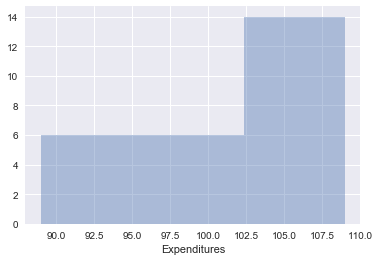

In [30]:
sns.distplot(df.loc[:, 'Expenditures'], kde=False)

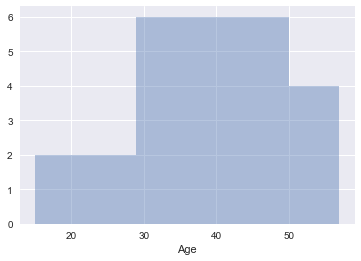

In [31]:
sns.distplot(df.loc[:, 'Age'], kde=False)

Make also a scatter diagram with expenditures on the vertical axis versus age on the horizontal axis.

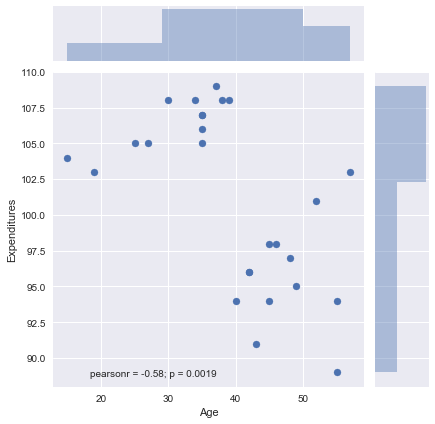

In [33]:
sns.jointplot('Age', 'Expenditures', data=df)

(b) In what respect do the data in this scatter diagram look different from the case of the sales and price data
discussed in the lecture?

#### A: Expenditures and Age are not linearly related whereas sales and price were.

(c) Propose a method to analyze these data in a way that assists the travel agent in making recommendations to
future clients.

#### A: Divide the Age into 2 groups:  Young (< 40) and Old(>=40).  
#### Expenditure increases for Young travellers with age. Not clear for Older travellers.

(d) Compute the sample mean of expenditures of all 26 clients.

In [36]:
round(df.Expenditures.mean(), 2)

101.12

(e) Compute two sample means of expenditures, one for clients of age forty or more and the other for clients of
age below forty.

In [38]:
round(df[df.Age >= 40].Expenditures.mean(), 2)
round(df[df.Age < 40].Expenditures.mean(), 2)

95.85

106.38

(f) What daily expenditures would you predict for a new client of fifty years old? And for someone who is twenty-five
years old?

#### Simple prediction
for a new client of fifty years old -> 95.85  
for a new client of twenty-five years old -> 106.38

# Training Exercise 1.2

### Questions

A transformation of the data on xi and yi (like taking their logarithm) changes the interpretation of the slope
parameter β.  
(a) Show that in the regression model log(yi) = α + β log(xi) + εi, the elasticity of y with respect to x is equal to β (that is, does not depend on the values of xi and yi).

$$ y = e^{\alpha + \beta log(x_i) + \epsilon_i} $$

$$ elasticity = \frac{dy/y}{dx/x} = \frac{dy}{dx} X \frac{x}{y} =  \frac{\beta e^{\alpha + \beta log(x_i) + \epsilon_i}}{x} X \frac{x}{e^{\alpha + \beta log(x_i) + \epsilon_i}} = \beta $$

(b) Determine the elasticity of y with respect to x in the model yi = α + β log(xi) + εi.

$$
elasticity = \frac{dy/y}{dx/x} = \frac{dy}{dx} X \frac{x}{y} = \frac{\beta}{x} X \frac{x}{y} = \frac{\beta}{y}
$$

(c) Determine the elasticity of y with respect to x in the model log(yi) = α + βxi + εi

$$ elasticity = \frac{dy/y}{dx/x} = \beta e^{\alpha + \beta log(x_i) + \epsilon_i} X \frac{x}{y} = \beta x$$

# Training Exercise 1.3

Winning time 100 meter athletics for men at Olympic Games 1948-2004.  
+ Year: calendar year of Olympic Game (1948-2004)
+ Game: order number of game (1-15)
+ Winmen: winning time 100 meter athletics for men (in seconds)

## Questions

Dataset contains the winning times (W) of the Olympic 100-meter finals (for men) from 1948 to 2004.  
The calendar years 1948-2004 are transformed to games (G) 1-15 to simplify computations.  
A simple regression model for the trend in winning times is Wi = α + βGi + εi.

In [73]:
datafile_path = "https://d396qusza40orc.cloudfront.net/eureconometrics-assets/Dataset%20Files%20for%20On-Demand%20Course/Exercises%20and%20datasets/Module%201/TrainExer13.txt"

df = pd.read_csv(datafile_path, sep="\t", header=0)
df.shape
df

(15, 3)

,Game,Year,Winning time men
0,1,1948,10.30
1,2,1952,10.40
2,3,1956,10.50
3,4,1960,10.20
4,5,1964,10.00
5,6,1968,9.95
6,7,1972,10.14
7,8,1976,10.06
8,9,1980,10.25
9,10,1984,9.99


(a) Compute a and b, and determine the values of $R^2$ and s.

$ b = \frac{\Sigma_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\Sigma_{i=1}^{n}(x_i - \bar{x})^2} $

In [74]:
numer = np.sum((df.Game - df.Game.mean()) * (df.iloc[:, 2] - df.iloc[:, 2].mean()))
denom = np.sum((df.Game - df.Game.mean()) ** 2)
b = numer/float(denom)
b

-0.038000000000000027

$a = \bar{y} - b\bar{x}$

In [75]:
a = df.iloc[:, 2].mean() - (b*df.Game.mean())
a

10.386000000000001

$ R^2 = \frac{SSE}{SST} = 1 - \frac{\Sigma_{i=1}^{n} e_i^2}{\Sigma_{i=1}^{n}(y_i - \bar{y})^2} $

In [78]:
predictions = a + (b * df.Game)
error = df.iloc[:, 2] - predictions
r_squared = round(1 - (np.sum(error ** 2)/float(np.sum((df.iloc[:, 2] - df.iloc[:, 2].mean())**2))), 2)
r_squared

0.67

$ s^2 = \frac{1}{n-2}\Sigma_{i=1}^{n} e_i^2 $

In [80]:
s_squared = (1/float(len(df) - 2)) * np.sum(error ** 2)
s = round(np.sqrt(s_squared), 2)
s

0.12

(b) Are you confident on the predictive ability of this model? Motivate your answer.

R squared isn't that great. 67% of variation in y is explained by variation in x.  
However, R squared is not the best indicator of the predictive ability of the model.  
Viewing the residual plot would be better.

(c) What prediction do you get for 2008, 2012, and 2016? Compare your predictions with the actual winning times.

In [81]:
pred_2008 = a + (b * 16)
pred_2008
pred_2012 = a + (b * 17)
pred_2012
pred_2016 = a + (b * 18)
pred_2016

9.7780000000000005

9.7400000000000002

9.702

## Fin!